In [11]:
#IMPORTAMOS LAS LIBRERIAS, EL ARCHIVO Y VISUALIZAMOS LA ESTRUCTURA Y DETALLES DEL ARCHIVO
#Y QUITAMOS LOS PUNTOS DE LAS CIFRAS DE NUESTRA DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
df = pd.read_csv('BandaAnchavsDialup.csv')
df['Banda_ancha_fija'] = df['Banda_ancha_fija'].str.replace('.', '').astype(float)
df['Total'] = df['Total'].str.replace('.', '').astype(float)

C:\Users\carlo\AppData\Local\Temp\ipykernel_2876\2502711102.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Banda_ancha_fija'] = df['Banda_ancha_fija'].str.replace('.', '').astype(float)
C:\Users\carlo\AppData\Local\Temp\ipykernel_2876\2502711102.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Total'] = df['Total'].str.replace('.', '').astype(float)


In [12]:
df

,Año,Trimestre,Banda_ancha_fija,Dial_up,Total,Periodo
0,2022,3,11078691.0,12437,11091128.0,Jul-Sept 2022
1,2022,2,10946248.0,12436,10958684.0,Abr-Jun 2022
2,2022,1,10611390.0,12619,10624009.0,Ene-Mar 2022
3,2021,4,10476933.0,12861,10489794.0,Oct-Dic 2021
4,2021,3,10075184.0,10357,10085541.0,Jul-Sept 2021
5,2021,2,9852702.0,10382,9863084.0,Abr-Jun 2021
6,2021,1,9637956.0,10016,9647972.0,Ene-Mar 2021
7,2020,4,9561546.0,10016,9571562.0,Oct-Dic 2020
8,2020,3,9346183.0,10016,9356199.0,Jul-Sept 2020
9,2020,2,9021040.0,10016,9031056.0,Abr-Jun 2020


In [27]:
# DESCRIBIMOS NUESTROS DATOS Y SACAMOS PROMEDIOS PARA DAR UN PRIMER VISTASO 
df.describe(include='all')

,Año,Trimestre,Banda_ancha_fija,Dial_up,Total,Periodo
count,35.000000,35.000000,3.500000e+01,35.000000,3.500000e+01,35
unique,NaN,NaN,NaN,NaN,NaN,35
top,NaN,NaN,NaN,NaN,NaN,Jul-Sept 2022
freq,NaN,NaN,NaN,NaN,NaN,1
mean,2017.885714,2.457143,8.274417e+06,20247.000000,8.297800e+06,NaN
std,2.564135,1.120474,1.408774e+06,11533.554299,1.399611e+06,NaN
min,2014.000000,1.000000,6.362108e+06,2853.000000,6.398398e+06,NaN
25%,2016.000000,1.500000,7.024946e+06,10072.000000,7.057455e+06,NaN
50%,2018.000000,2.000000,8.083533e+06,21793.000000,8.110444e+06,NaN
75%,2020.000000,3.000000,9.244537e+06,30510.000000,9.260442e+06,NaN


VEMOS QUE LA INFORMACION QUE NOS SALE TIENE NUMEROS MUY GRANDES PORQUE ESTAMOS MONITOREANDO A POBLACIONES ENTERAS

PODEMOS VER QUE DEL 2014 AL 2022 CASI SE DUPICLO EL USO DE BANDA ANCHA

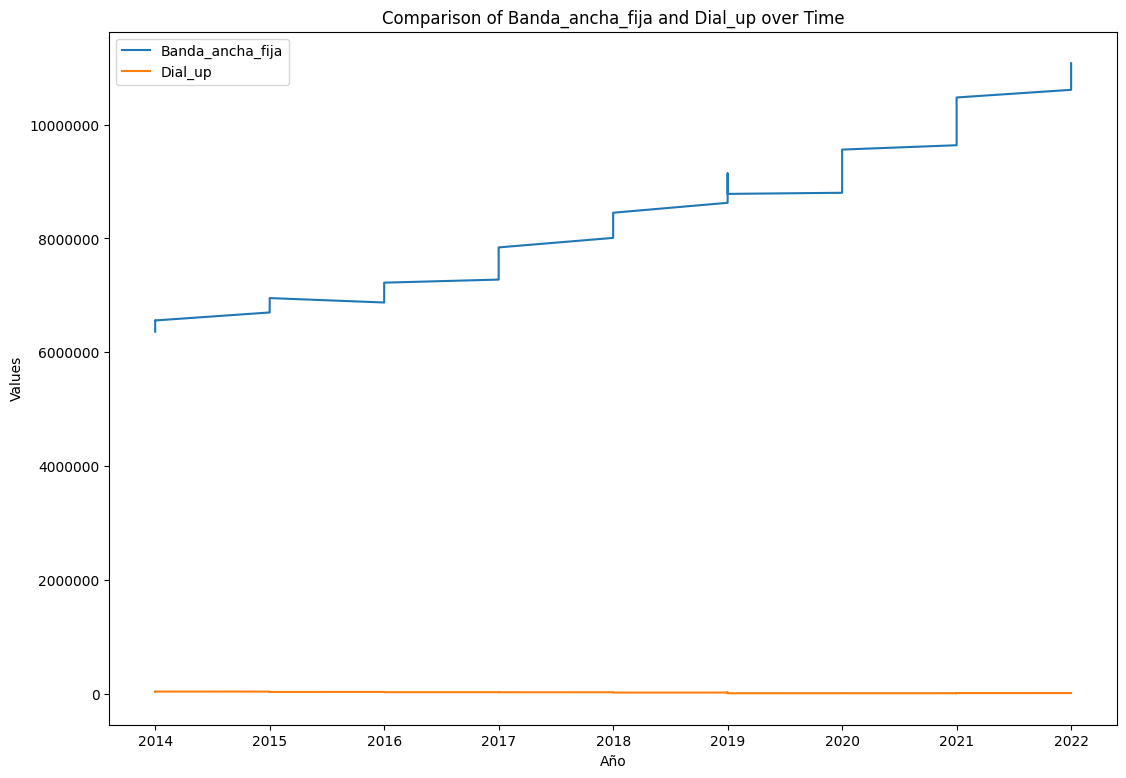

In [24]:

plt.figure(figsize=(13, 9))
plt.plot(df['Año'], df['Banda_ancha_fija'], label='Banda_ancha_fija')
plt.plot(df['Año'], df['Dial_up'], label='Dial_up')
plt.xlabel('Año')
plt.ylabel('Values')
plt.title('Comparison of Banda_ancha_fija and Dial_up over Time')
plt.legend()
 # Display complete values instead of scientific notation
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

PODEMOS OBSERVAR QUE EL DIAL UP ES PRACTICAMENTE DESPRECIABLE EN COMPARACION CON LA BANDA ANCHA 

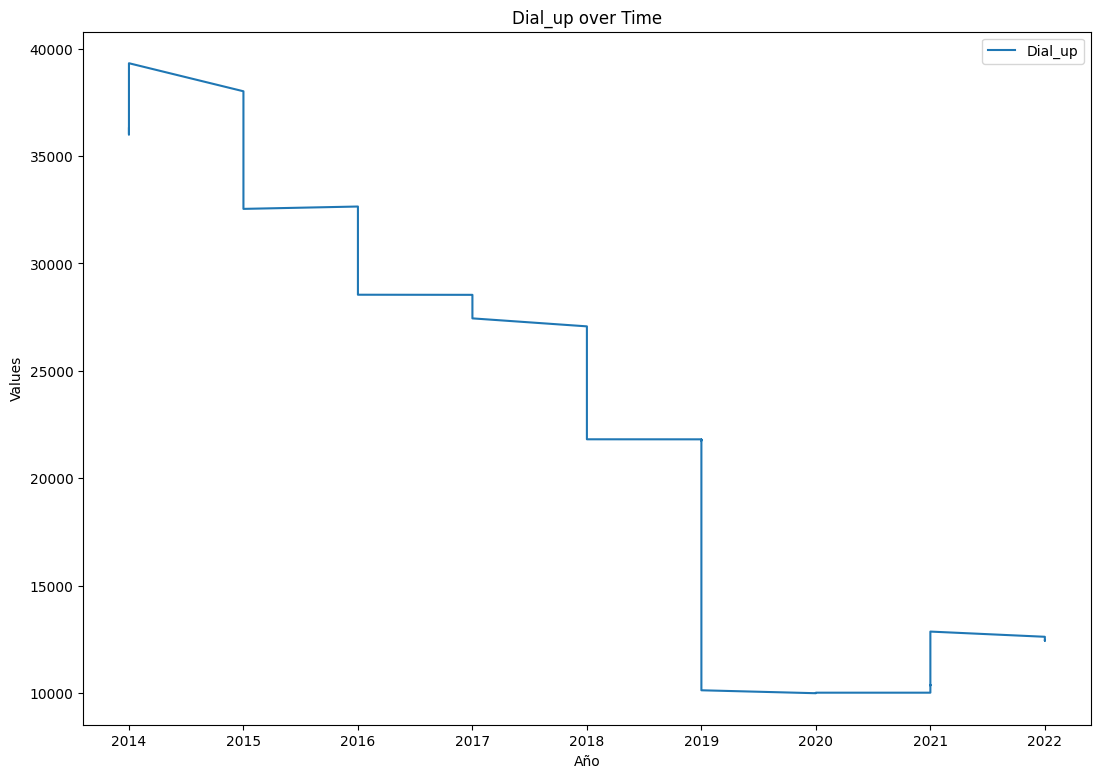

In [25]:
plt.figure(figsize=(13, 9))
plt.plot(df['Año'], df['Dial_up'], label='Dial_up')
plt.xlabel('Año')
plt.ylabel('Values')
plt.title('Dial_up over Time')
plt.legend()
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

AQUI PODEMOS VER COMO VA DESPARECIENDO ESTA TECONOLOGIA CON CADA AÑO

In [34]:
df2 = pd.read_csv('Internet_BAF.csv')
df2['Banda_ancha_fija'] = df['Banda_ancha_fija'].replace('.', '').astype(float)
df2['Total'] = df['Total'].replace('.', '').astype(float)
df2['Dial_up'] = df['Dial_up'].replace('.', '').astype(float)
df2
#VEMOS COMO EL PROMEDIO DE VELOCIDAD EN ARGENTINA ES MUY BUENO

KeyError: 'Banda_ancha_fija'

In [ ]:
df3 = pd.read_csv('historico_velocidad_internet.csv')
df3
